In [2]:
print("Hello World")

Hello World


In [3]:
with open('api_keys.txt', 'r') as api_key_file:
   api_key = api_key_file.read().strip()

In [4]:
%pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [6]:
endpoint = "https://api.fda.gov/food/enforcement.json"

params = {
    'search':'reason_for_recall:"egg"',
    'limit': 500
}

headers = {
    'Content-Type': 'application/json',
    'api_key': api_key
}

response = requests.get(endpoint, params=params, headers=headers)

if response.status_code == 200:
    data = response.json()
else:
    print("Error:", response.status_code)

In [7]:
import pandas as pd

results = data.get('results', [])

df = pd.DataFrame(results)

In [59]:
print(df.dtypes)


country                               object
city                                  object
address_1                             object
reason_for_recall                     object
address_2                             object
product_quantity                      object
code_info                             object
center_classification_date            object
distribution_pattern                  object
state                                 object
product_description                   object
report_date                           object
classification                        object
openfda                               object
recalling_firm                        object
recall_number                         object
initial_firm_notification             object
product_type                          object
event_id                              object
termination_date                      object
recall_initiation_date                object
postal_code                           object
voluntary_

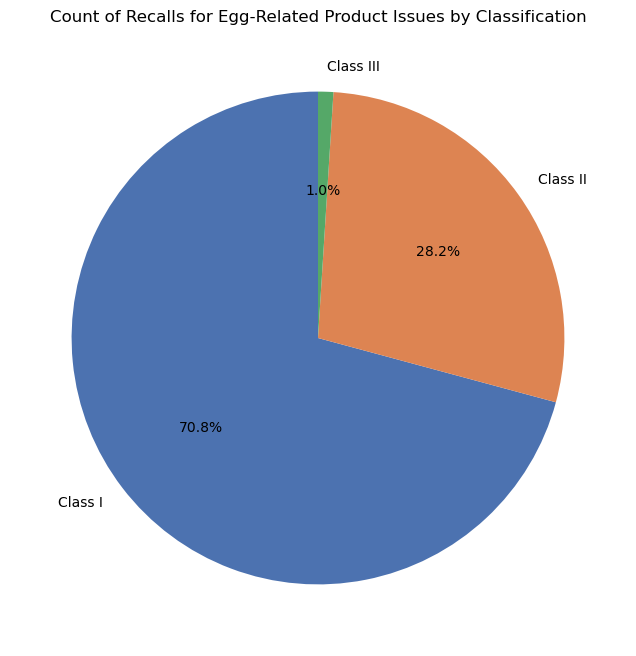

In [56]:
category_order = df['classification'].value_counts().index

plt.figure(figsize=(8, 8))
plt.pie(df['classification'].value_counts(), labels=category_order, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))

plt.title("Proportion of Recalls for Egg-Related Product Issues by Classification")
plt.show()

In [ ]:
category_order = df['state'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(df, x="state", order = category_order)
plt.xticks(rotation=90) 
plt.title("Count of Recalls for Egg-Related Product Issues by Classification")

In [41]:
df.to_csv('FDA_egg_stats.csv', index=False)

In [10]:
df['datetime_report_date'] = pd.to_datetime(df['report_date'])

In [9]:
print(df.head())

         country        city                 address_1  \
0  United States      Kearns             4850 S 5300 W   
1  United States   La Crosse               1626 Oak St   
2  United States    Brooklyn              4120 2nd Ave   
3  United States  Pittsburgh              101 Kappa Dr   
4  United States      Austin  601 N Lamar Blvd Ste 300   

                                   reason_for_recall address_2  \
0  Condies Foods is recalling Veggie Cups due to ...             
1  Kwik Trip is recalling Kitchen's Cravings Prem...             
2  Products contain undeclared allergen, specific...             
3  On 3/20/2015, it was discovered that the label...             
4                            Undeclared egg allergen             

                                    product_quantity  \
0                                          166 cases   
1                                        4,957 units   
2  40 cartons; 50-200g packets/carton; total: 2,0...   
3                        Apric

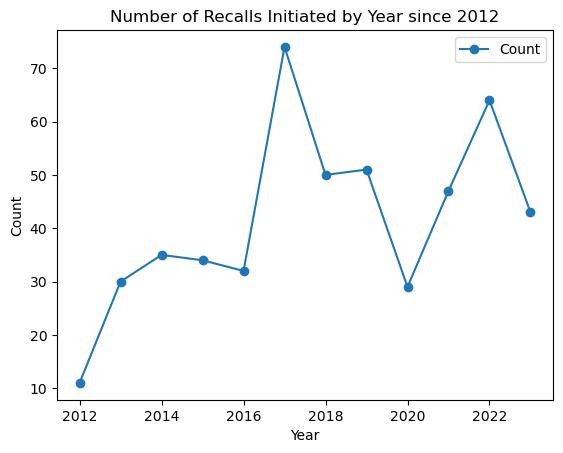

In [50]:
df_counts = df.groupby('Year').size().reset_index(name='Count')

# Set the 'Date' column as the index
df_counts.set_index('Year', inplace=True)

# Plot the time series
df_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Recalls Initiated by Year since 2012')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='classification', ylabel='count'>

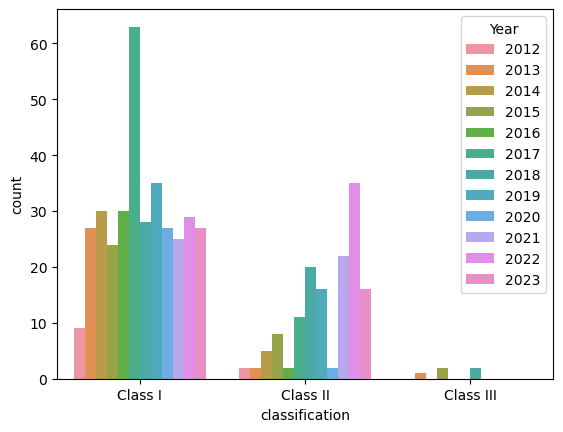

In [52]:
sns.countplot(df, x="classification", hue = "Year")

In [47]:
df['Year'] = df['datetime_report_date'].dt.year
df['Month'] = df['datetime_report_date'].dt.month
df['Day'] = df['datetime_report_date'].dt.day

In [48]:
df['Day']

0      31
1      25
2      18
3      10
4      15
       ..
495    20
496    14
497    17
498    23
499     9
Name: Day, Length: 500, dtype: int64

Text(0.5, 1.0, 'Count of Recalls for Egg-Related Product Issues by State')

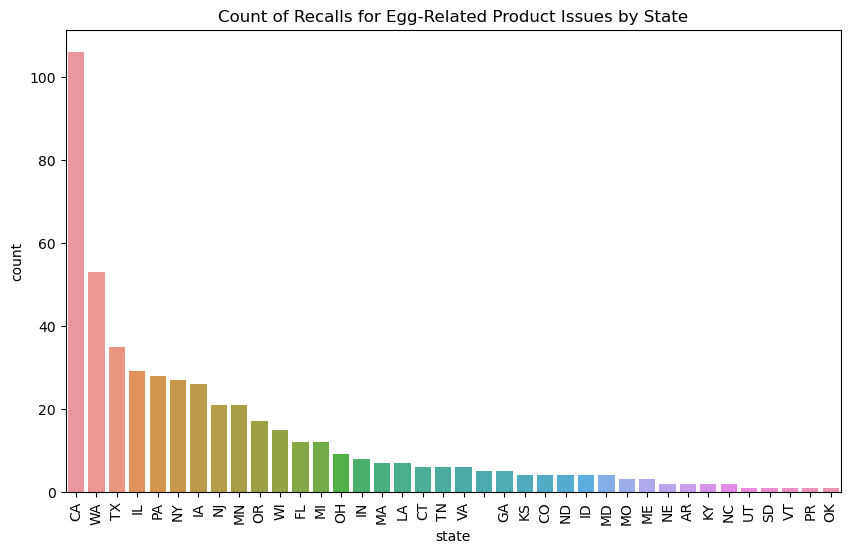

In [54]:
category_order = df['state'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(df, x="state", order = category_order)
plt.xticks(rotation=90) 
plt.title("Count of Recalls for Egg-Related Product Issues by State")

In [62]:
df_2017 = df[df['Year'] == 2017]

In [63]:
print(df_2017)

           country         city               address_1  \
23   United States   Emeryville  5980 Horton St Ste 200   
25   United States      Chester           1037 State St   
30   United States         Fife    7214 26th St E C-102   
31   United States  Rock Valley            1438 Main St   
33   United States  Rock Valley            1438 Main St   
..             ...          ...                     ...   
480  United States      Spokane       210 W Pacific Ave   
481  United States      Salinas          1275 Hansen St   
482  United States  Rock Valley            1438 Main St   
484  United States  New Century  101 Prairie Village Dr   
488  United States     Brisbane              99 Park Ln   

                                     reason_for_recall address_2  \
23                                      undeclared egg             
25             The product may contain undeclared egg.             
30   The Ingredients statement declared wheat, egg,...             
31   Bakery product

Text(0.5, 1.0, 'Count of Recalls for Egg-Related Product Issues by State')

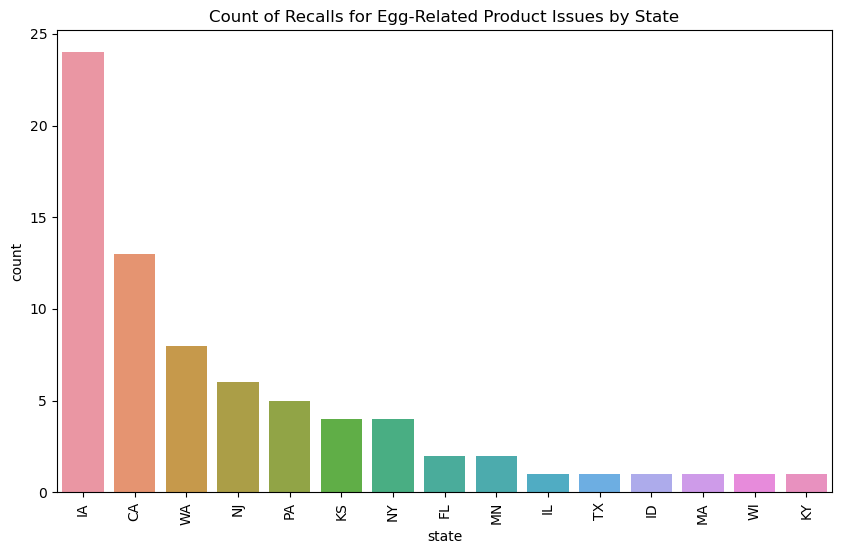

In [64]:
category_order = df_2017['state'].value_counts().index
plt.figure(figsize=(10, 6))
sns.countplot(df_2017, x="state", order = category_order)
plt.xticks(rotation=90) 
plt.title("Count of Recalls for Egg-Related Product Issues by State")